In [45]:
# Importing programs, porting in database
import sqlite3
import pandas as pd
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [4]:
# Creating dataset for each team with total number of home
# games played, and home goals scored.
c.execute("""select distinct HomeTeam as team,
                    count(HomeTeam) as homeGames,
                    sum(FTHG) as homeGoals
                    from matches
                    where Season == 2011
                    group by 1;""")
df_home = pd.DataFrame(c.fetchall())
df_home.columns = [x[0] for x in c.description]

In [5]:
# Creating dataset for each team with total number of away
# games played, and away goals scored.
c.execute("""select distinct AwayTeam as team,
                    count(AwayTeam) as awayGames,
                    sum(FTAG) as awayGoals
                    from matches
                    where Season == 2011
                    group by 1;""")
df_away = pd.DataFrame(c.fetchall())
df_away.columns = [x[0] for x in c.description]

In [6]:
# Merging datasets
df_total = pd.merge(df_home, df_away, on="team")

In [7]:
# Summing total games played.
df_total['totalGamesplayed'] = df_total.apply(
    (lambda x: x['homeGames']+x['awayGames']), axis=1)

In [8]:
# Summing total goals earned.
df_total['totalPointsearned'] = df_total.apply(
    (lambda x: x['homeGoals']+x['awayGoals']), axis=1)

In [9]:
# Dropping unnecessary columns
df_total = df_total.drop(
    columns=['homeGames', 'homeGoals', 'awayGames', 'awayGoals'])

In [46]:
# Creating list of home teams, away teams, and winners
c.execute("""select date, HomeTeam, AwayTeam, FTHG, FTAG, FTR
                    from matches
                    where Season == 2011;""")
df_res = pd.DataFrame(c.fetchall())
df_res.columns = [x[0] for x in c.description]

In [47]:
# Changing date to datetime
df_res['Date'] = df_res.Date.map(lambda x:
                                 pd.to_datetime(x[:10],
                                                format='%Y/%m/%d'))

In [48]:
# Creating a list of winning and losing teams for each game
df_res['homeValue'] = df_res.apply((lambda x: "win" if x['FTR'] == "H" else (
    "loss" if x['FTR'] == "A" else "draw")), axis=1)

df_res['awayValue'] = df_res.apply((lambda x: "win" if x['FTR'] == "A" else (
    "loss" if x['FTR'] == "H" else "draw")), axis=1)

In [13]:
# Counting number of games each team has won and lost
lc_df = df_res['gamesLost'].value_counts()
wc_df = df_res['gamesWon'].value_counts()

In [14]:
# Resetting indexes
lc_df = lc_df.reset_index()
wc_df = wc_df.reset_index()

In [15]:
# Merge win and loss datasets
df_all = pd.merge(wc_df, lc_df, on="index")

In [16]:
# Change column name
df_all = df_all.rename(columns={'index': 'team'})

In [17]:
# Merge datasets
df_total = df_total.merge(df_all, how="left", on="team")

In [24]:
df_total.team.nunique()

56

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
total_won = df_total['gamesWon']
total_lost = df_total['gamesLost']

(array([0.02678571, 0.02678571, 0.03571429, 0.0625    , 0.04464286,
        0.10714286, 0.08928571, 0.04464286, 0.02678571, 0.03571429]),
 array([ 3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23.]),
 <a list of 10 Patch objects>)

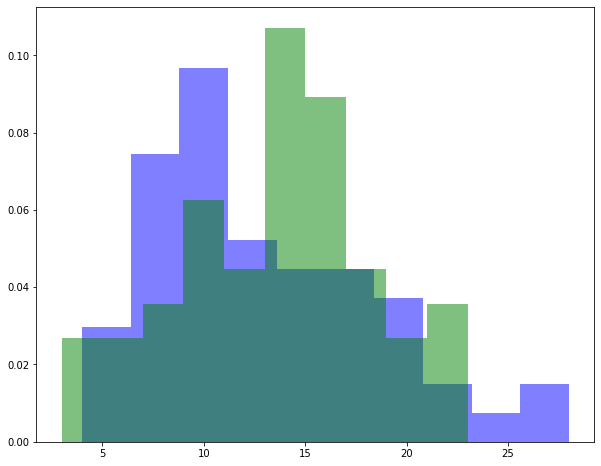

In [23]:
plt.figure(figsize = (10,8))
plt.hist(total_won, bins = 10, density = True, alpha =0.5, color = 'blue')
plt.hist(total_lost, bins = 10, density = True, alpha = 0.5, color = 'green')

In [49]:
df_res.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,homeValue,awayValue
0,2012-03-31,Nurnberg,Bayern Munich,0,1,A,loss,win
1,2011-12-11,Stuttgart,Bayern Munich,1,2,A,loss,win
2,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,loss,win
3,2011-11-27,Mainz,Bayern Munich,3,2,H,win,loss
4,2012-02-18,Freiburg,Bayern Munich,0,0,D,draw,draw


In [56]:
df_win_home = df_res.loc[df_res.FTR=="H", ['Date', 'HomeTeam', 'FTHG']]

In [58]:
df_win_away = df_res.loc[df_res.FTR=="A", ['Date', 'AwayTeam', 'FTAG']]

In [61]:
df_win_away = df_win_away.rename(columns={'AwayTeam': 'Team', "FTAG": "Goals"})

In [62]:
df_win_home = df_win_home.rename(columns={'HomeTeam': 'Team', "FTHG": "Goals"})

In [66]:
df_win = pd.concat([df_win_home, df_win_away])

In [67]:
df_win.head()

,Date,Team,Goals
3,2011-11-27,Mainz,3
5,2012-01-20,M'gladbach,3
9,2011-10-23,Hannover,2
11,2012-03-03,Leverkusen,2
16,2012-04-11,Dortmund,1


In [68]:
df_lose_home = df_res.loc[df_res.FTR=="A", ['Date', 'HomeTeam', 'FTHG']]

In [69]:
df_lose_away = df_res.loc[df_res.FTR=="H", ['Date', 'AwayTeam', 'FTAG']]

In [70]:
df_lose_away = df_lose_away.rename(columns={'AwayTeam': 'Team', "FTAG": "Goals"})

In [71]:
df_lose_home = df_lose_home.rename(columns={'HomeTeam': 'Team', "FTHG": "Goals"})

In [73]:
df_lose = pd.concat([df_lose_home, df_lose_away])

In [74]:
df_lose.head()

,Date,Team,Goals
0,2012-03-31,Nurnberg,0
1,2011-12-11,Stuttgart,1
2,2011-08-13,Wolfsburg,0
7,2012-04-21,Werder Bremen,1
8,2011-09-18,Schalke 04,0


In [142]:
df_win

,Date,Team,Goals
3,2011-11-27,Mainz,3
5,2012-01-20,M'gladbach,3
9,2011-10-23,Hannover,2
11,2012-03-03,Leverkusen,2
16,2012-04-11,Dortmund,1
21,2011-08-13,Hoffenheim,1
26,2011-09-18,Hannover,2
36,2012-03-16,Ein Frankfurt,3
38,2011-08-06,Greuther Furth,1
39,2011-11-04,Fortuna Dusseldorf,2


In [ ]:
def winlose(team, wins, losses):
    

In [158]:
wins = df_win.loc[(df_win['Team']=='Mainz'), ['Goals']]
losses = df_lose.loc[(df_lose['Team']=='Mainz'), ['Goals']]
losses = list(losses.Goals)
wins = list(wins.Goals)

In [166]:
wins

[3, 4, 3, 4, 2, 2, 3, 2, 3]

In [169]:
def winloss(team):
    wins = df_win.loc[(df_win['Team']==team), ['Goals']]
    losses = df_lose.loc[(df_lose['Team']==team), ['Goals']]
    losses = list(losses.Goals)
    wins = list(wins.Goals)
    plt.figure(figsize = (10,8))
    plt.hist(x=wins, bins = (max(wins)+1), density = True, alpha =.5, color = 'blue')
    plt.hist(x=losses, bins = (max(wins)+1), density = True, alpha = .5, color = 'green')
    plt.xticks(range(max(wins)+1))
    print(list(wins))
    print(list(losses))

[3, 4, 3, 4, 2, 2, 3, 2, 3]
[1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1]


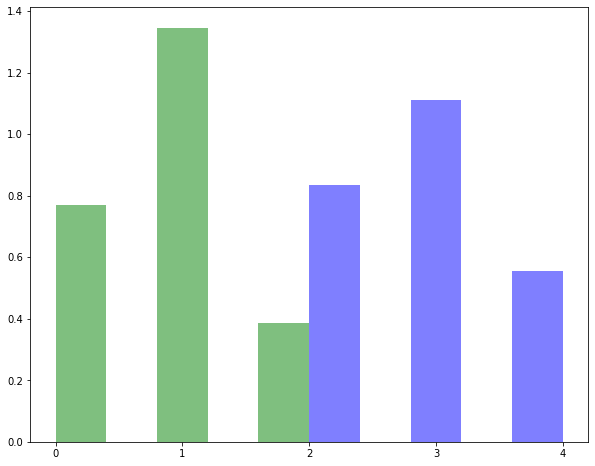

In [170]:
winloss('Mainz')

In [ ]:
for 